# Convert COCO JSON Annotations to VOC XML
Use this notebook to try out importing, analyzing, and exporting datasets of image annotations. 

This notebook shows a full end to end example using most of the features of PyLabel. But the task of converting from one format to anothr can be accomplished with 2 commands--import and export.

```
from pylabel import importer
dataset = importer.ImportCoco(path_to_annotations)
dataset.ExportToVOC()

```

In [1]:
!pip install -i https://test.pypi.org/simple/ pylabel==0.1.1

Looking in indexes: https://test.pypi.org/simple/


In [2]:
from pylabel import importer

## Import coco annotations 
First we will import annotations from the coco dataset, which are in coco json format. 

In [3]:
import os 
import zipfile

#Download sample coco dataset 
os.makedirs("data", exist_ok=True)
!wget "https://github.com/pylabelalpha/notebook/blob/main/BCCD_coco.zip?raw=true" -O data/BCCD_coco.zip
with zipfile.ZipFile("data/BCCD_coco.zip", 'r') as zip_ref:
   zip_ref.extractall("data")

#Specify path to the coco.json file
path_to_annotations = "data/BCCD_Dataset.json"
#Specify the path to the images (if they are in a different folder than the annotations)
path_to_images = ""

#Import the dataset into the pylable schema 
dataset = importer.ImportCoco(path_to_annotations, path_to_images=path_to_images, name="BCCD_coco")
dataset.df.head(5)

--2021-10-18 21:11:17--  https://github.com/pylabelalpha/notebook/blob/main/BCCD_coco.zip?raw=true
Resolving github.com (github.com)... 192.30.255.112
Connecting to github.com (github.com)|192.30.255.112|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/pylabelalpha/notebook/raw/main/BCCD_coco.zip [following]
--2021-10-18 21:11:18--  https://github.com/pylabelalpha/notebook/raw/main/BCCD_coco.zip
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/pylabelalpha/notebook/main/BCCD_coco.zip [following]
--2021-10-18 21:11:18--  https://raw.githubusercontent.com/pylabelalpha/notebook/main/BCCD_coco.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting respo

,id,img_folder,img_filename,img_path,img_id,img_width,img_height,img_depth,ann_segmented,ann_bbox_xmin,...,ann_area,ann_segmentation,ann_iscrowd,ann_pose,ann_truncated,ann_difficult,cat_id,cat_name,cat_supercategory,split
0,,,BloodImage_00315.jpg,None,0,640,480,3,0,164.0,...,13699.0,None,None,Unspecified,0,0,0,RBC,None,
1,,,BloodImage_00315.jpg,None,0,640,480,3,0,15.0,...,13699.0,None,None,Unspecified,0,0,0,RBC,None,
2,,,BloodImage_00315.jpg,None,0,640,480,3,0,13.0,...,11781.0,None,None,Unspecified,0,0,0,RBC,None,
3,,,BloodImage_00315.jpg,None,0,640,480,3,0,239.0,...,11960.0,None,None,Unspecified,0,0,0,RBC,None,
4,,,BloodImage_00315.jpg,None,0,640,480,3,0,542.0,...,10290.0,None,None,Unspecified,1,0,0,RBC,None,


## Analyze annotations
Pylabel can calculate basic summary statisticts about the dataset such as the number of files and the classes. 
The dataset is stored as a pandas frame so the developer can do additional exploratory analysis on the dataset. 

In [4]:
print(f"Number of images: {dataset.analyze.num_images}")
print(f"Number of classes: {dataset.analyze.num_classes}")
print(f"Classes:{dataset.analyze.classes}")
print(f"Class counts:\n{dataset.analyze.class_counts}")

Number of images: 364
Number of classes: 3
Classes:['RBC' 'WBC' 'Platelets']
Class counts:
RBC          4155
WBC           372
Platelets     361
Name: cat_name, dtype: int64


## Visualize Annotations 
You can render the bounding boxes for your image to inspect them and confirm that they imported correctly.  

data/BloodImage_00315.jpg


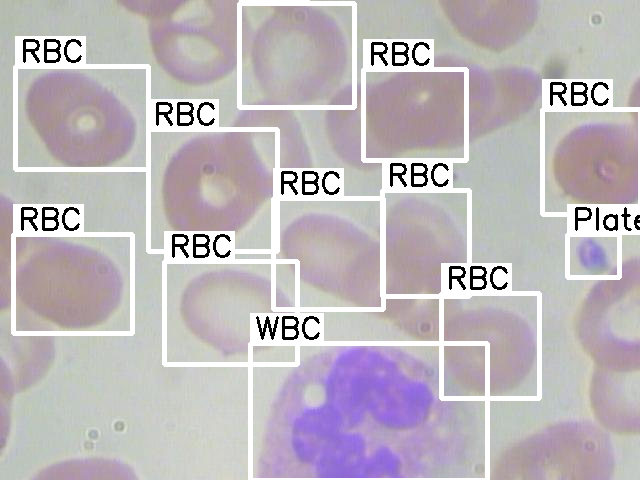

data/BloodImage_00315.jpg


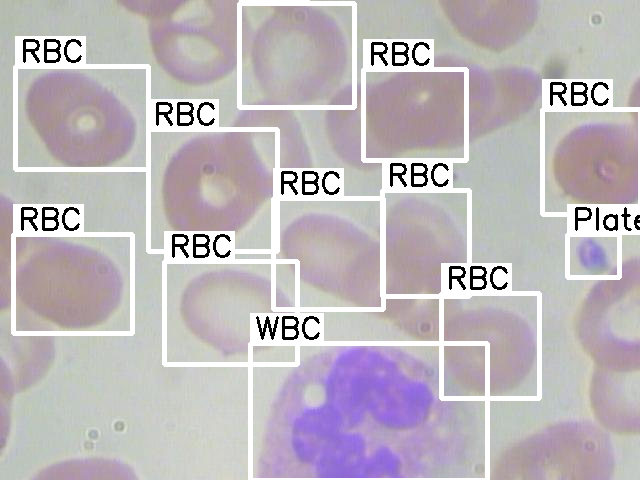

In [5]:
from IPython.display import Image, display
display(dataset.visualize.ShowBoundingBoxes(dataset, 0))
display(dataset.visualize.ShowBoundingBoxes(dataset, "BloodImage_00315.jpg"))

# Export to VOC XML
The PyLabel exporter will export all of the annotations in the dataframe to the desired target format.
VOC creates one XML for each Jpeg in the dataset. 

In [7]:
dataset.export.ExportToVoc(dataset, write_to_file_=True, output_file_path_="data/voc_annotations/")

Annotations written to data/voc_annotations/


()